## Image Processing

In [1]:
import numpy as np
from scipy import misc, ndimage
from skimage import feature, io, filters, morphology, measure
from skimage import data, color
import matplotlib.pyplot as plt
%matplotlib inline

If you want to run the demo on your own image, you can copy the image into the folder that you saved this notebook to. Enter its filename in the box below:

In [2]:
filename = "banana.jpg"
img = data.imread(filename,as_grey=True)
img_rgb = misc.imread(filename);

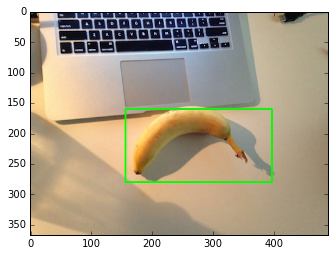

shape of image RGB is (367, 490, 3)


In [3]:
plt.imshow(img_rgb)
plt.show()
print("shape of image RGB is " + str(img_rgb.shape))

### RGB Color Model

Images are made up of a 2 dimensional grid. The size of these dimensions are the first 2 numbers in the shape output above.

We call each cell in the grid a *pixel*. Each pixel has a location that is equal to its position in the x and y axis. The top left location is (0, 0)

If we zoom in far enough, we can see these pixels:

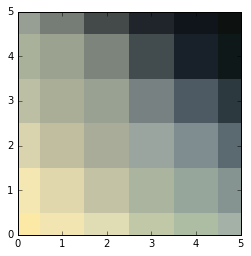

In [4]:
plt.imshow(img_rgb, interpolation='none')
plt.xlim(0,5)
plt.ylim(0,5)
plt.show()

How does an image determine what color to display each pixel? This is what the third dimension of an image is for. Here is an example value of this dimension:

In [5]:
print(img_rgb[0,0])

[253 234 166]


Each channel corresponds to the colors Red Green and Blue (where "RGB" comes from), and each value is how much of that color to mix.

In [ ]:
print(str(img_rgb))

You can change the value of a pixel by setting it to a new combination of Red Green and Blue:

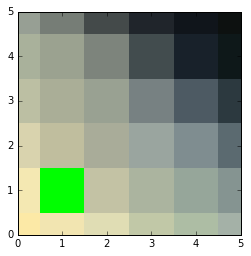

In [6]:
img_rgb[1,1] = np.array([0, 255, 0])
plt.imshow(img_rgb, interpolation='none')
plt.xlim(0,5)
plt.ylim(0,5)
plt.show()

### Grayscale

In computer vision and image processing, it is often easier to deal with black and white images to keep things simpler

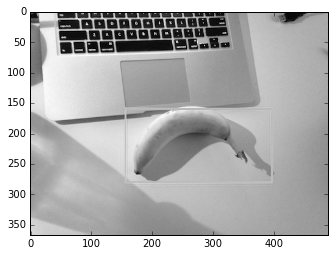

shape of image gray is (367, 490)


In [7]:
plt.imshow(img, cmap='gray')
plt.show()
print("shape of image gray is "+str(img.shape)) # why? 

Notice that the shape of the image has changed, we have lost the 3rd dimension. Why did this happen?

In [8]:
print(img[0,0])

0.91425372549


## Filtering

You can apply filters to your image for various effects that can be useful for computer vision

### Gaussian Blurring

Removes high frequency signal (noise) from your image

/usr/local/lib/python3.5/site-packages/skimage/filters/_gaussian.py:13: skimage_deprecation: Call to deprecated function ``gaussian_filter``. Use ``skimage.filters.gaussian`` instead.
  multichannel=None):


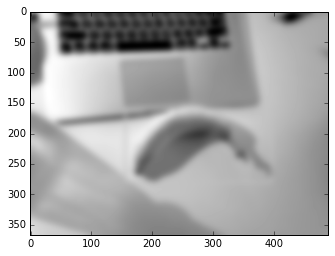

In [9]:
img_blurred = filters.gaussian_filter(img, sigma=5)
plt.imshow(img_blurred, cmap='gray')
plt.show()

### Edge Detection

Useful for detecting objects and shapes in your image

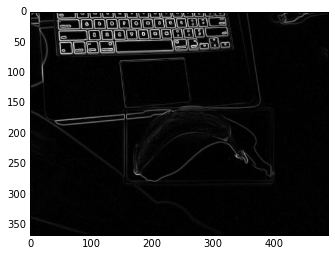

In [10]:
img_edges = filters.sobel(img)
plt.imshow(img_edges, cmap='gray')
plt.show()

### Thresholding

Useful for trying to extract shapes from your image

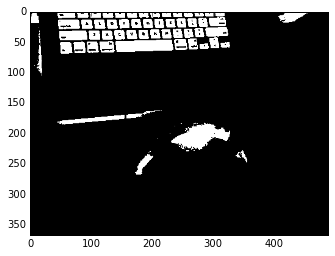

In [11]:
img_thresh = filters.threshold_otsu(img)
plt.imshow(img < img_thresh, cmap='gray')
plt.show()